In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

nc_filename=sorted(glob.glob('*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['2s-ENG_1m_19580101_19581231_ptrc_T.nc', '2sadvchanged-ENG_1m_19580101_19581231_ptrc_T.nc', 'ANHA4-ENG_1h_19580630_19580630_ptrc_T.nc', 'ANHA4-ENG_1m_19590101_19611231_ptrc_T.nc', 'ENG-Th_1m_19590101_19611231_ptrc_T.nc']


In [2]:
ptrc=nc.Dataset(nc_filename[1])
#ptrcANHA=nc.Dataset(nc_filename[1])
print ptrc.variables

lon=ptrc.variables['nav_lon'][400:,:]
lat=ptrc.variables['nav_lat'][400:,:]
dep = ptrc.variables['deptht'][:]
TR_7=ptrc.variables['TR_7'][:,:,400:,:]#/ptrc.variables['TR_8'][:,:,400:,:]
ice_th=ptrc.variables['TR_12'][:,:,400:,:]
#TR_7ANHA=ptrcANHA.variables['TR_7'][:,:,400:,:]



tmask=nc.Dataset(
        '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/crop.nc')
tmask=tmask.variables['tmask'][0,:,400:,:]


bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

OrderedDict([(u'nav_lon', <netCDF4.Variable object at 0x7ff6691dc478>), (u'nav_lat', <netCDF4.Variable object at 0x7ff6691dc510>), (u'deptht', <netCDF4.Variable object at 0x7ff6691dc9d0>), (u'time_counter', <netCDF4.Variable object at 0x7ff6691dca68>), (u'time_counter_bnds', <netCDF4.Variable object at 0x7ff6691dcb00>), (u'TR_7', <netCDF4.Variable object at 0x7ff6691dcb98>), (u'TR_8', <netCDF4.Variable object at 0x7ff6691dcc30>), (u'TR_9', <netCDF4.Variable object at 0x7ff6691dccc8>), (u'TR_10', <netCDF4.Variable object at 0x7ff6691dcd60>), (u'TR_11', <netCDF4.Variable object at 0x7ff6691dcdf8>), (u'TR_12', <netCDF4.Variable object at 0x7ff6691dce90>)])


In [3]:
TR_7.shape

(12, 50, 400, 544)

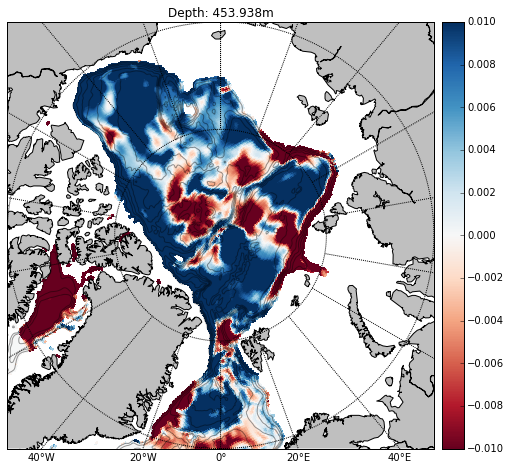

In [4]:
#difference between Th initial field and final field
TR_8=ptrc.variables['TR_8'][:,:,400:,:]

layer=30
time =5
data =TR_8[time,:,:,:]-TR_8[0,:,:,:]#-TR_7[time,:,:,:]
data =np.ma.masked_where(tmask==0,data)
#diss pa


fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='RdBu',vmin=-0.01,vmax=0.01);m.colorbar()
m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
plt.title('Depth: %sm'%dep[layer])
plt.show()

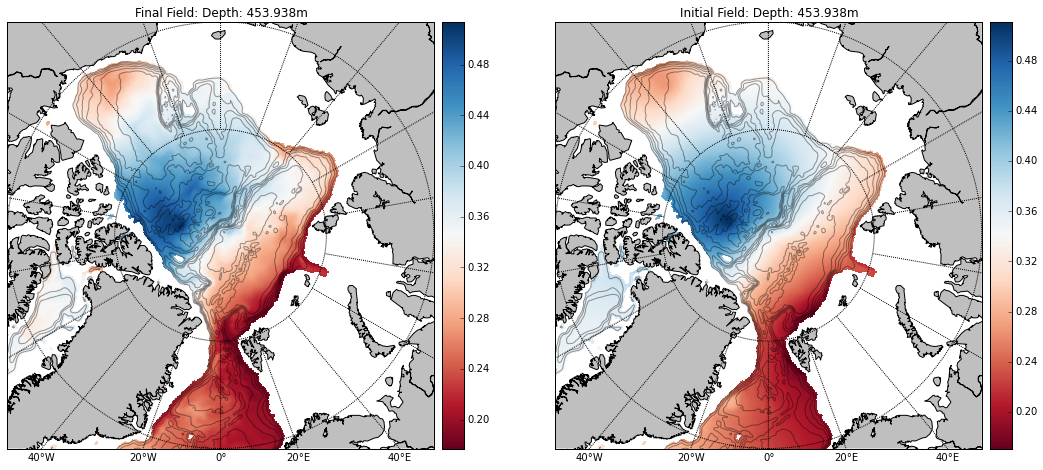

In [5]:
# Th plots of Final field and Initial field
fig = plt.figure(figsize=(18,10))
data =TR_8[time,:,:,:]#-TR_7[time,:,:,:]
data =np.ma.masked_where(tmask==0,data)
ax = fig.add_subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')#,round='true')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='RdBu');m.colorbar()
m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
plt.title('Final Field: Depth: %sm'%dep[layer])

data =TR_8[0,:,:,:]#-TR_7[time,:,:,:]
data =np.ma.masked_where(tmask==0,data)
ax = fig.add_subplot(1,2,2)
m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')#,round='true')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='RdBu');m.colorbar()
m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
plt.title('Initial Field: Depth: %sm'%dep[layer])
plt.show()

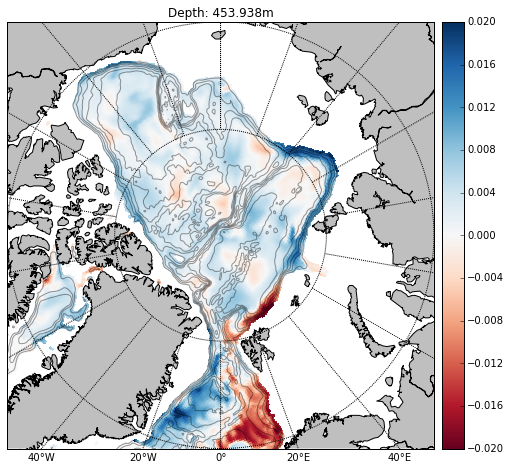

In [6]:
# difference between final Pa field and Th field
layer=30
time =5
data =TR_7[time,:,:,:]-TR_7[0,:,:,:]#-TR_7[time,:,:,:]
data =np.ma.masked_where(tmask==0,data)


fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='RdBu',vmin=-0.02,vmax=0.02);m.colorbar()
m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
plt.title('Depth: %sm'%dep[layer])
plt.show()

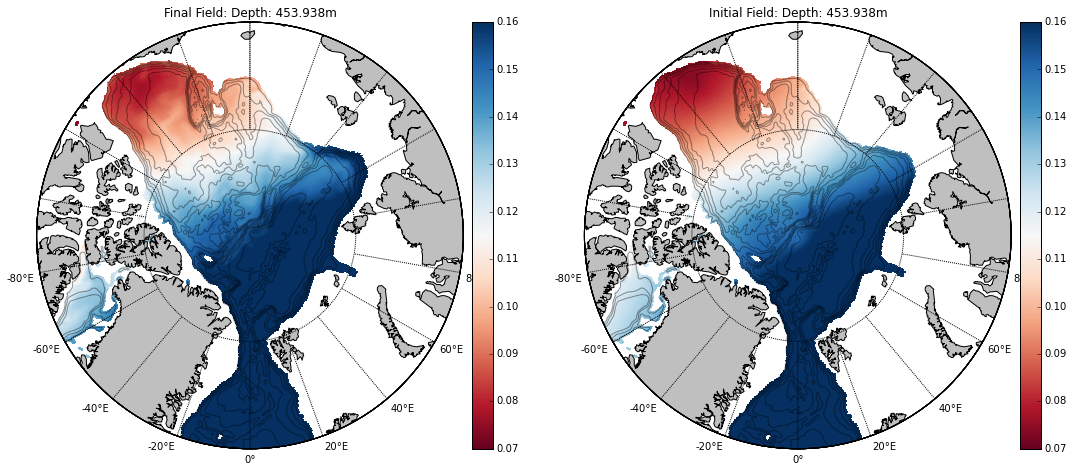

In [7]:
# pa initial field and final field
fig = plt.figure(figsize=(18,10))
data =TR_7[time,:,:,:]#-TR_7[time,:,:,:]
data =np.ma.masked_where(tmask==0,data)
ax = fig.add_subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round='true')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='RdBu',vmax=0.16,vmin=0.07);m.colorbar()
m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
plt.title('Final Field: Depth: %sm'%dep[layer])

data =TR_7[0,:,:,:]#-TR_7[time,:,:,:]
data =np.ma.masked_where(tmask==0,data)
ax = fig.add_subplot(1,2,2)
m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round='true')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
m.pcolor(x_lon,y_lat,data[layer,:,:],cmap='RdBu',vmax=0.16,vmin=0.07);m.colorbar()
m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
plt.title('Initial Field: Depth: %sm'%dep[layer])
#part pa/th
plt.show()

In [8]:
# ice conc. difference between initial field and final field.

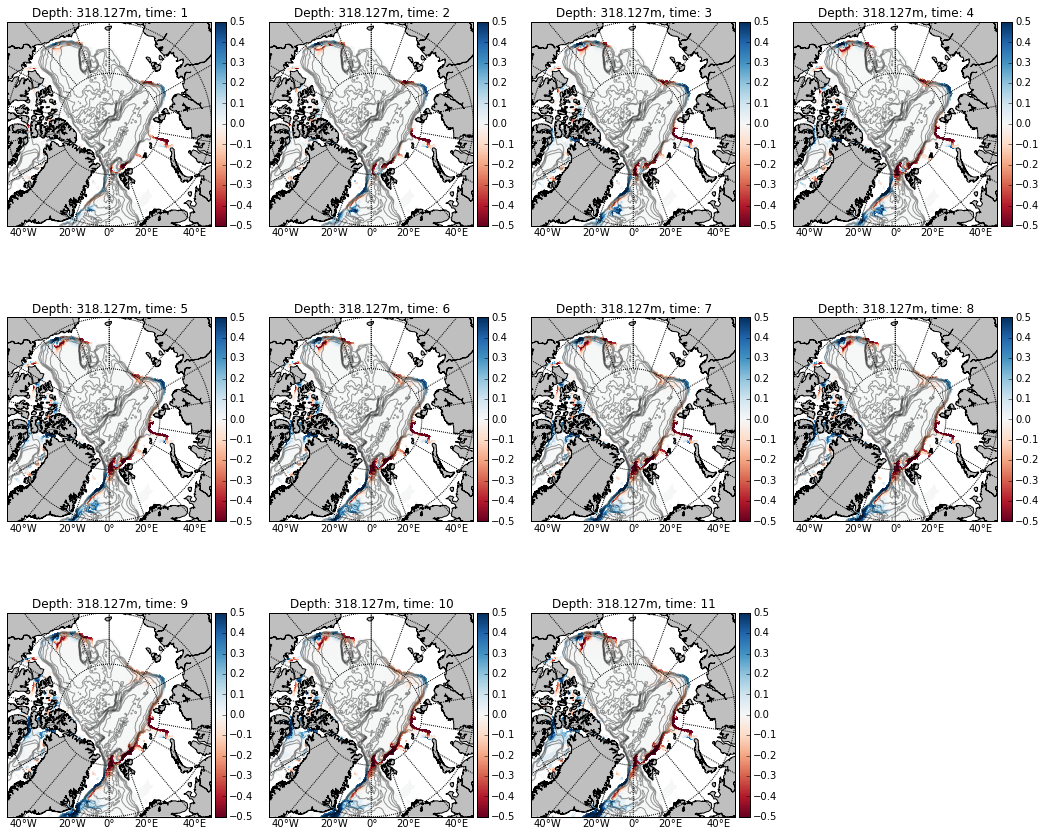

In [9]:
layer=28
k=0

fig = plt.figure(figsize=(18,15))
for i in range (1,12,1):
    time =i
    data =ice_th[time,:,:,:]-ice_th[0,:,:,:]#-TR_7[time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)

    k+=1

    ax = fig.add_subplot(3,4,k)
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.pcolor(x_lon,y_lat,data[layer,:,:],vmin=-0.5,vmax=0.5,cmap='RdBu');m.colorbar()
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.title('Depth: %sm, time: %s'%(dep[layer],i))

plt.show()

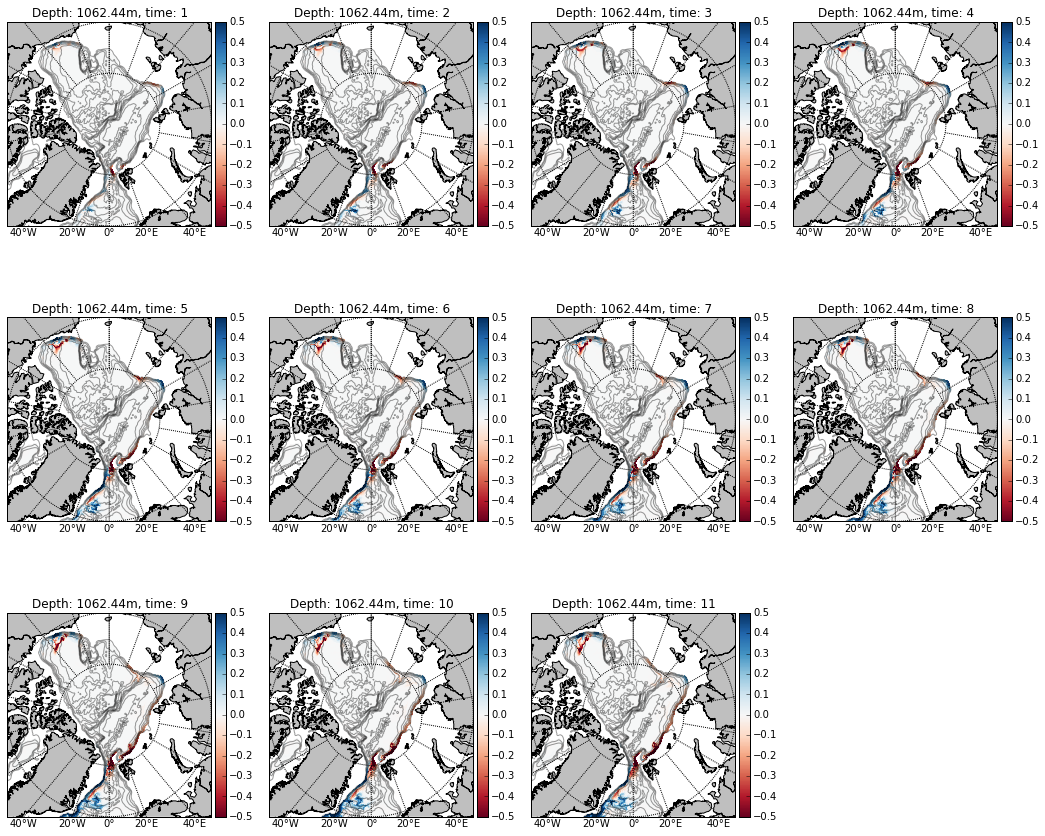

In [11]:
layer=35
k=0

fig = plt.figure(figsize=(18,15))
for i in range (1,12,1):
    time =i
    data =ice_th[time,:,:,:]-ice_th[0,:,:,:]#-TR_7[time,:,:,:]
    data =np.ma.masked_where(tmask==0,data)

    k+=1

    ax = fig.add_subplot(3,4,k)
    m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.pcolor(x_lon,y_lat,data[layer,:,:],vmax=0.5,vmin=-0.5,cmap='RdBu');m.colorbar()
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.title('Depth: %sm, time: %s'%(dep[layer],i))

plt.show()